<a href="https://colab.research.google.com/github/surajsrivathsa/ovgu_deeplearning/blob/master/Assignment_1_Let_the_Tensors_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
%tensorflow_version 2.x
import tensorflow as tf
from sklearn import preprocessing
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [16]:
files.upload()

Saving datasets.py to datasets (1).py


{'datasets.py': b'import numpy as np\n\n\nclass MNISTDataset:\n    """\'Bare minimum\' class to wrap MNIST numpy arrays into a dataset."""\n    def __init__(self, train_imgs, train_lbs, test_imgs, test_lbls, batch_size,\n                 to01=True, shuffle=True, seed=None):\n        """\n        Use seed optionally to always get the same shuffling (-> reproducible\n        results).\n        """\n        self.batch_size = batch_size\n        self.train_data = train_imgs\n        self.train_labels = train_lbs.astype(np.int32)\n        self.test_data = test_imgs\n        self.test_labels = test_lbls.astype(np.int32)\n\n        if to01:\n            # int in [0, 255] -> float in [0, 1]\n            self.train_data = self.train_data.astype(np.float32) / 255\n            self.test_data = self.test_data.astype(np.float32) / 255\n\n        self.size = self.train_data.shape[0]\n\n        if seed:\n            np.random.seed(seed)\n        if shuffle:\n            self.shuffle_train()\n        

In [0]:
print(os.getcwd())

/content


In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [17]:

path = '.'
 
files = os.listdir(path)
for name in files:
    print(name)

.config
__pycache__
drive
datasets.py
datasets (1).py
sample_data


In [0]:
from datasets import MNISTDataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

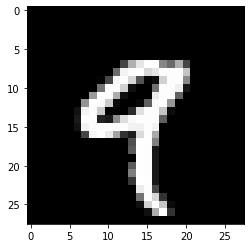

In [144]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[4], cmap="Greys_r")

In [0]:
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [0]:
! pip install sklearn

In [0]:
!ls -ltr

total 16
drwxr-xr-x 1 root root 4096 Apr  3 16:24 sample_data
-rw-r--r-- 1 root root 2067 Apr 23 12:28 datasets.py
drwx------ 4 root root 4096 Apr 23 12:38 drive
drwxr-xr-x 2 root root 4096 Apr 23 12:39 __pycache__


In [0]:
!pwd

/content


In [0]:
a = tf.constant(3.0)
b = tf.constant(5.0)

In [0]:
a

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [0]:
a + b

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [0]:
print(tf.add([1.0, 2.7], [3.0, 4.8]))
print(tf.reduce_sum([1, 2, 3, 4]))


tf.Tensor([4.  7.5], shape=(2,), dtype=float32)
tf.Tensor(10, shape=(), dtype=int32)


In [0]:
x = tf.matmul([[1, 2, 3], [4, 5, 6]], [[1,2], [3,4], [5,6]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[22 28]
 [49 64]], shape=(2, 2), dtype=int32)
(2, 2)
<dtype: 'int32'>


In [0]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
# with tf.GradientTape() as tape:

In [0]:
training_steps = 10000
learning_rate = 0.05
W1 = tf.Variable(initial_value=np.random.rand(784, 10), dtype= tf.float32)
B1 = tf.Variable(initial_value=np.random.rand(1, 10), dtype = tf.float32)

Error Faced during training in next step due to data type issue in weights and biases
Weights and biases were of float64(double type) but float32(float) type expected.

Error message: InvalidArgumentError: cannot compute MatMul as input #0(zero-based) was expected to be a float tensor but is a double tensor [Op:MatMul]
Solution link : https://stackoverflow.com/questions/54255431/invalidargumenterror-cannot-compute-matmul-as-input-0zero-based-was-expected

In [0]:
print(W1.shape)
print(B1.shape)
#print(B1)
#print(W1)

(784, 10)
(1, 10)


In [0]:
for step in range(training_steps):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as tape:
    logits = tf.matmul(img_batch, W1) + B1
    error = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = lbl_batch, logits = logits))
  
  grads1 = tape.gradient(error, [W1, B1])
  W1.assign_sub(learning_rate * grads1[0])
  B1.assign_sub(learning_rate * grads1[1])

  if(step % 100 == 0):
    preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
    print("Loss: {} and Accuracy: {}".format(error, accuracy))

In [0]:
test_preds = tf.argmax(tf.matmul(data.test_data, W1) + B1, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.913, shape=(), dtype=float32)


Single layer Perceptron is completed, moving on to MLP

init_params function could dynamically generate parameters for number of hidden layers. It can also tune the initialization according to some value of param_initializer

In [139]:
def init_params(layer_matrix=[784,100,10], param_initializer=0.0):
  params = {}
  params_list = []
  param_idx = len(layer_matrix)
  if (len(layer_matrix) < 2):
    raise Exception("layer matrix must have atleast an input and output layer")

  for i in range(1, param_idx):
    l1 = layer_matrix[i-1]
    l2 = layer_matrix[i]
    params["W" + str(i)] = tf.Variable(initial_value=np.random.rand(l1, l2) * param_initializer, dtype= tf.float32)
    params["B" + str(i)] = tf.Variable(initial_value=np.random.rand(1, l2) * param_initializer, dtype = tf.float32)
    #params_list.append("W" + str(i))
    #params_list.append("B" + str(i))
    params_list.append(params["W" + str(i)] )
    params_list.append(params["B" + str(i)])
  return [params, params_list];

"""
params, params_list = init_params()
for key,val in params.items():
  print(key + ": " + str(val.shape))
params_list
"""

'\nparams, params_list = init_params()\nfor key,val in params.items():\n  print(key + ": " + str(val.shape))\nparams_list\n'

In [30]:
def init_hyperparameters(iterations=100,learning_rate=0.1,batch_size=128):
  hyper_parameters = {}
  hyper_parameters["iterations"] = iterations
  hyper_parameters["learning_rate"] = learning_rate
  hyper_parameters["batch_size"] = batch_size
  return hyper_parameters;

"""
hyper_parameters = init_hyperparameters()
for key, val in hyper_parameters.items():
  print(key + " : " + str(val))
"""

'\nhyper_parameters = init_hyperparameters()\nfor key, val in hyper_parameters.items():\n  print(key + " : " + str(val))\n'

In [44]:
def init_activations(layer_matrix=[784,100,10]):
  activations = {}
  for i in range(1, len(layer_matrix)):
    activations["Z" + str(i)] = None
    activations["A" + str(i)] = None
  
  return activations;

"""
activations = init_activations()
for key, val in activations.items():
  print(key + " : " + str(val))
"""

'\nactivations = init_activations()\nfor key, val in activations.items():\n  print(key + " : " + str(val))\n'

In [0]:
def calculate_loss(actual_labels, predicted_labels=logits):
  xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = actual_labels, logits = predicted_labels))
  return xent

In [151]:
def forward_propagation(params, hyper_parameters, activations, features, labels, activation_function="relu"):
  learning_rate = hyper_parameters["learning_rate"]
  logits = None
  with tf.GradientTape() as tape:
    num = (len(list(activations.keys())) // 2) + 1
    for i in range(1, num):
      #special case for first input layer
      if( i == 1):
        activations["Z" + str(i)] = tf.matmul(features, params["W" + str(i)]) + params["B" + str(i)]

        if(activation_function == "relu"):
          activations["A" + str(i)] = tf.nn.relu(activations["Z" + str(i)])
        elif(activation_function == "tanh"):
          activations["A" + str(i)] = tf.nn.tanh(activations["Z" + str(i)])
        else:
          activations["A" + str(i)] = tf.nn.sigmoid(activations["Z" + str(i)])

      elif(i > 1 and i < num-1):
        activations["Z" + str(i)] = tf.matmul(activations["A" + str(i-1)], params["W" + str(i)]) + params["B" + str(i)]

        if(activation_function == "relu"):
          activations["A" + str(i)] = tf.nn.relu(activations["Z" + str(i)])
        elif(activation_function == "tanh"):
          activations["A" + str(i)] = tf.nn.tanh(activations["Z" + str(i)])
        else:
          activations["A" + str(i)] = tf.nn.sigmoid(activations["Z" + str(i)])

      #special case to handle last layer as it contains some other activation function
      # output layer is hardcoded to softmax
      elif(i == num - 1):
        activations["Z" + str(i)] = tf.matmul(activations["A" + str(i-1)], params["W" + str(i)]) + params["B" + str(i)]
        logits = activations["Z" + str(i)] 
        activations["A" + str(i)] = tf.nn.softmax(activations["Z" + str(i)])

    cost = calculate_loss(labels, logits)
  return [tape, logits, activations, cost];
"""
errors recieved in this function:
1. reason: tf.gradienttape did not have closing braces 
error: AttributeError: __enter__   
solution: https://stackoverflow.com/questions/51427729/python-error-attributeerror-enter

2. reason: missed to do floor division in num = (len(list(activations.keys())) / 2) + 1
error: TypeError: 'float' object cannot be interpreted as an integer

"""
  

"\nerrors recieved in this function:\n1. reason: tf.gradienttape did not have closing braces \nerror: AttributeError: __enter__   \nsolution: https://stackoverflow.com/questions/51427729/python-error-attributeerror-enter\n\n2. reason: missed to do floor division in num = (len(list(activations.keys())) / 2) + 1\nerror: TypeError: 'float' object cannot be interpreted as an integer\n\n"

In [116]:
def backward_propagation(tape, params, cost, params_list, hyper_parameters):
  learning_rate = hyper_parameters["learning_rate"]
  grads = tape.gradient(cost, params_list)
  #print(type(grads[1]))
  #print(len(grads))
  for i in range(1, len(grads), 2):
    ix = i//2 + 1
    #print(type(params["W" + str(ix)]))
    params["W" + str(ix)].assign_sub(learning_rate * grads[i-1])
    params["B" + str(ix)].assign_sub(learning_rate * grads[i])
  
  return params

"""
1. reason: tape requires list of actual tensorflow variables to keep track of, i had provided it a list of strings like "W1" instead of contents inside W1
error: TypeError: Cannot convert value 'W1' to a TensorFlow DType.
fix: fixed in init_param function

2. reason: tape requires a valid cost and list of parameters it should update, I had provided an invalid cost. Hence tape provided list of objects
of all NoneType
error: TypeError: unsupported operand type(s) for *: 'float' and 'NoneType' : params["W" + str(ix)].assign_sub(learning_rate * grads[i-1])
fix: added cost as parameter to function and used the same inside tape

3. reason: again recieved similar error as 2
error: TypeError: unsupported operand type(s) for *: 'float' and 'NoneType' : params["W" + str(ix)].assign_sub(learning_rate * grads[i-1])
fix: introspection forward propagation function told that the calculation of cost was not inside the scope of With clause of gradienttape
hence tape was not tracking cost, even though cost was computed outside with clause. Hence tape could not replay the cost resulting in no gradients
"""


'\n1. reason: tape requires list of actual tensorflow variables to keep track of, i had provided it a list of strings like "W1" instead of contents inside W1\nerror: TypeError: Cannot convert value \'W1\' to a TensorFlow DType.\nfix: fixed in init_param function\n\n2. reason: tape requires a valid cost and list of parameters it should update, I had provided an invalid cost. Hence tape provided list of objects\nof all NoneType\nerror: TypeError: unsupported operand type(s) for *: \'float\' and \'NoneType\' : params["W" + str(ix)].assign_sub(learning_rate * grads[i-1])\nfix: added cost as parameter to function and used the same inside tape\n\n3. reason: again recieved similar error as 2\nerror: TypeError: unsupported operand type(s) for *: \'float\' and \'NoneType\' : params["W" + str(ix)].assign_sub(learning_rate * grads[i-1])\nfix: introspection forward propagation function told that the calculation of cost was not inside the scope of With clause of gradienttape\nhence tape was not tra

In [161]:
def run_model(hyper_parameters, params, activations, grads, params_list, activation_function="relu"):
  iterations = hyper_parameters["iterations"];
  report_dict = {}
  costs = []
  steps = []
  accuracy = []
  for step in range(iterations):

    features,  labels = data.next_batch()
    #print(features.shape)
    #print(labels.shape)

    tape, logits, activations, cost = forward_propagation(params, hyper_parameters, activations, features, labels, activation_function);
    #                                 forward_propagation(params, hyper_parameters, activations, features, labels, activation_function="relu")
    params = backward_propagation(tape, params, cost, params_list, hyper_parameters)

    if(step % 100 == 0):
      preds = tf.argmax(logits, axis=1, output_type=tf.int32)
      acc = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))
      steps.append(step)
      accuracy.append(acc)
      costs.append(cost)
      print("")
      print("Cost at {} iteration and accuracy are: {} , {}".format(step, cost, acc))

  report_dict["cost"] = costs
  report_dict["steps"] = steps
  report_dict["accuracy"] = accuracy
  return costs, report_dict

"""
1. reason: missed using cost parameter while calling backward prop
error: TypeError: backward_propagation() missing 1 required positional argument: 'hyper_parameters'
fix: added parameter

2. reason: using an old global variable instead of variable passed to function
error: shape mismatch while calculating cost function
fix: replaced the old global var "train_feature_batch" with local var called "feature"
"""

'\n1. reason: missed using cost parameter while calling backward prop\nerror: TypeError: backward_propagation() missing 1 required positional argument: \'hyper_parameters\'\nfix: added parameter\n\n2. reason: using an old global variable instead of variable passed to function\nerror: shape mismatch while calculating cost function\nfix: replaced the old global var "train_feature_batch" with local var called "feature"\n'

In [188]:
# performing Initializations of hyperparameters, parameters and activations
layer_matrix = [784, 200, 50 ,10]
hyper_parameters = init_hyperparameters(iterations = 7000, learning_rate = 0.1, batch_size = 128)
params, params_list = init_params(layer_matrix = layer_matrix, param_initializer = 0.01)
activations = init_activations(layer_matrix= layer_matrix)
print(type(params_list[0]))

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


In [0]:
# testing forward prop
train_features_batch, train_labels_batch = data.next_batch()
tape, logits, activations, cost = forward_propagation(params, hyper_parameters, activations, train_features_batch, train_labels_batch, activation_function="relu")



In [156]:
# printed output recieved from one forward pass
print(tape)
print(logits)
print(activations.keys())
print(cost)
print(params["B2"])

tf.Tensor(
[[25.244429 23.151955 23.114632 ... 24.75577  26.43208  25.060719]
 [17.695206 16.228666 16.122757 ... 17.303791 18.589573 17.432745]
 [21.280712 19.577728 19.569845 ... 20.751434 22.325182 21.162598]
 ...
 [29.830671 27.322517 27.404358 ... 29.19024  31.388338 29.573343]
 [23.531584 21.531326 21.526363 ... 23.015947 24.651817 23.173769]
 [29.523157 27.13232  26.865808 ... 28.808971 30.81881  29.238995]], shape=(128, 10), dtype=float32)
dict_keys(['Z1', 'A1', 'Z2', 'A2'])
tf.Tensor(2.78189, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.03472899,  0.09558134,  0.01729195,  0.03279727,  0.08431684,
         0.0444666 ,  0.08504613,  0.07441913, -0.00381327,  0.02102601]],
      dtype=float32)>


In [0]:
# testing backward pass
params = backward_propagation(tape, params, cost, params_list, hyper_parameters)

In [155]:
# printing output recieved from back propagation
print(params["B2"])

<tf.Variable 'Variable:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.03472899,  0.09558134,  0.01729195,  0.03279727,  0.08431684,
         0.0444666 ,  0.08504613,  0.07441913, -0.00381327,  0.02102601]],
      dtype=float32)>


In [189]:
# testing complete model run
costs, report_dict = run_model(hyper_parameters, params, activations, grads, params_list, activation_function="relu")


Cost at 0 iteration and accuracy are: 2.3028132915496826 , 0.09375
Starting new epoch...

Cost at 100 iteration and accuracy are: 2.2376084327697754 , 0.234375

Cost at 200 iteration and accuracy are: 1.8995378017425537 , 0.2734375

Cost at 300 iteration and accuracy are: 1.851440668106079 , 0.2734375

Cost at 400 iteration and accuracy are: 1.8355517387390137 , 0.2421875

Cost at 500 iteration and accuracy are: 1.7023751735687256 , 0.2890625
Starting new epoch...

Cost at 600 iteration and accuracy are: 1.7243726253509521 , 0.3046875

Cost at 700 iteration and accuracy are: 1.5012097358703613 , 0.3203125

Cost at 800 iteration and accuracy are: 1.470348596572876 , 0.4765625

Cost at 900 iteration and accuracy are: 1.192514181137085 , 0.6171875
Starting new epoch...

Cost at 1000 iteration and accuracy are: 0.8410085439682007 , 0.7734375

Cost at 1100 iteration and accuracy are: 0.6898727416992188 , 0.828125

Cost at 1200 iteration and accuracy are: 0.43991923332214355 , 0.875

Cost a

In [0]:
# function to get accuracy on test dataset

def test_model(hyper_parameters, params, activations, grads, params_list, activation_function="relu"):
  features = data.test_data;
  labels = data.test_labels
  test_tape, test_logits, test_activations, test_cost = forward_propagation(params, hyper_parameters, activations, features, labels, activation_function)
  #Z1_test = tf.matmul(data.test_data, W1) + B1
  #A1_test = tf.nn.relu(Z1_test)

  #logits_test = tf.matmul(A1_test, W2) + B2

  test_preds = tf.argmax(test_logits, axis=1,output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, labels),tf.float32))
  print(acc)

In [190]:
test_model(hyper_parameters, params, activations, grads, params_list, activation_function="relu")

tf.Tensor(0.974, shape=(), dtype=float32)


In [0]:
def plot_figures(hyper_parameters, report_dict):
  dict = copy.deepcopy(report_dict)
  #print(report_dict.keys())

  for key, val in dict.items():
    if(key == "cost" or key == "accuracy"):
      for i in range(0, len(val)):
          val[i] = val[i].numpy()

  #print(dict)

  #my_tensor.numpy()
  report_df =  pd.DataFrame(dict, columns=['cost', 'steps', 'accuracy'])
  report_df.head()
  # gca stands for 'get current axis'
  ax = plt.gca()
  report_df.plot(kind='line',x='steps',y='cost',ax=ax)
  plt.show()

  ax1 = plt.gca()
  report_df.plot(kind='line',x='steps',y='accuracy', color='red', ax=ax1)
  plt.show()

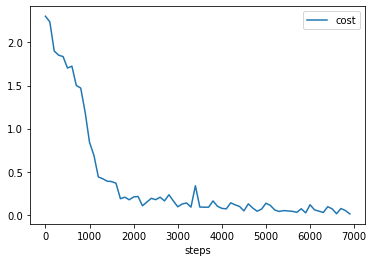

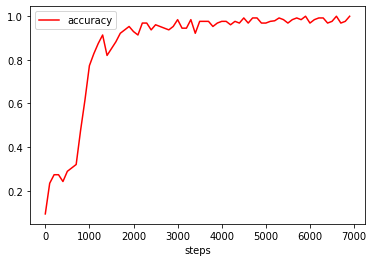

In [191]:
plot_figures(hyper_parameters, report_dict)

In [52]:
print(activations)

{'Z1': None, 'A1': None, 'Z2': None, 'A2': None}


In [39]:
for i in range(1, 8, 2):
    print(i//2 + 1)

1
2
3
4


In [0]:
training_steps = 10000
learning_rate = 0.05
W1 = tf.Variable(initial_value=np.random.rand(784, 100), dtype= tf.float32)
B1 = tf.Variable(initial_value=np.random.rand(1, 100), dtype = tf.float32)
W2 = tf.Variable(initial_value=np.random.rand(100, 10), dtype= tf.float32)
B2 = tf.Variable(initial_value=np.random.rand(1, 10), dtype = tf.float32)

In [0]:
for step in range(5000):
  train_features_batch, train_labels_batch = data.next_batch()

  with tf.GradientTape() as tape:
    #tape.watch([W1, B1, W2, B2])
    Z1 = tf.matmul(train_features_batch, W1) + B1
    A1 = tf.nn.relu(Z1)
    #tape.watch([Z1, A1])
    logits = tf.matmul(A1, W2) + B2
    
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = train_labels_batch, logits = logits))
    #tape.watch(xent)
  
  grads = tape.gradient(xent, [ W1, B1, W2, B2])
  #print(grads[0] )
  #print(grads[1])
  #print(grads[2])
  W1.assign_sub(learning_rate * grads[0])
  B1.assign_sub(learning_rate * grads[1])
  W2.assign_sub(learning_rate * grads[2])
  B2.assign_sub(learning_rate * grads[3])


  if(step%500 == 0):
    # print(grads)
    #print(grads[0])
    #print(grads[1])
    #print(grads[2])
    #print(grads[3])
    preds = tf.argmax(logits, axis = 1,output_type = tf.int32)
    acc = tf.reduce_mean(tf.cast(tf.equal(preds, train_labels_batch), dtype = tf.float32))
    print("Loss: {} and Accuracy: {}".format(xent, acc))

In [0]:

Z1_test = tf.matmul(data.test_data, W1) + B1
A1_test = tf.nn.relu(Z1_test)
#tape.watch([Z1, A1])
logits_test = tf.matmul(A1_test, W2) + B2

test_preds = tf.argmax(logits_test, axis=1,output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.9736, shape=(), dtype=float32)
